# Import the Dataset

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/cambridgecoding/machinelearningregression/master/data/bikes.csv')
data.head(3)

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0


Pandas can read the csv without saving it in the disk if  you provide the URL for the csv.

# Data Pre-Processing

We need to predict the variable 'count.'
Also, we will be converting the variable 'date' to a datetime object to make it easier to extract information from it.

In [2]:
data['date'] = data['date'].apply(pd.to_datetime)

data['year'] = [i.year for i in data['date']]
data['month'] = [i.month_name()[0:3] for i in data['date']]
data['day'] = [i.day_name()[0:3] for i in data['date']]

In [3]:
data.head()

,date,temperature,humidity,windspeed,count,year,month,day
0,2011-01-03,2.716070,45.715346,21.414957,120.0,2011,Jan,Mon
1,2011-01-04,2.896673,54.267219,15.136882,108.0,2011,Jan,Tue
2,2011-01-05,4.235654,45.697702,17.034578,82.0,2011,Jan,Wed
3,2011-01-06,3.112643,50.237349,10.091568,88.0,2011,Jan,Thu
4,2011-01-07,2.723918,49.144928,15.738204,148.0,2011,Jan,Fri


# Visualising the Data

Import the necessary libraries to plot the data. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

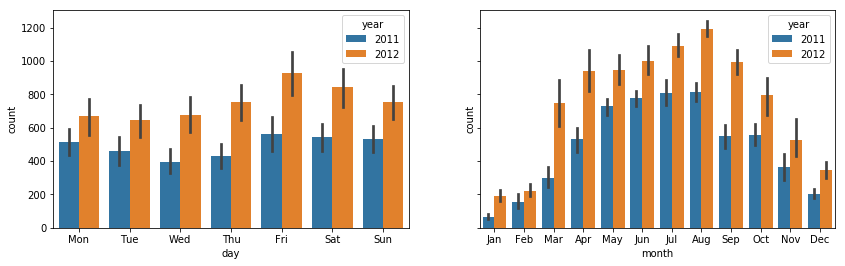

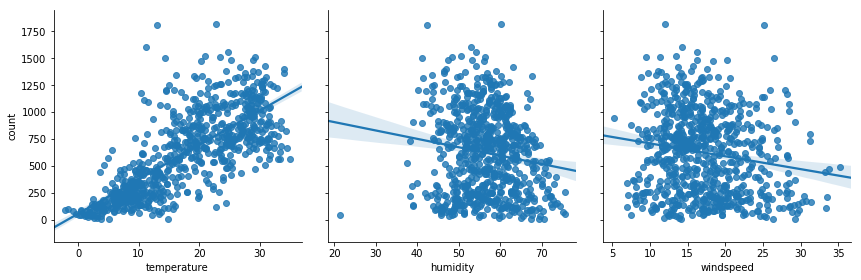

In [5]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='count', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='count', hue='year', ax=ax2)
pp = sns.pairplot(data=data,
y_vars=['count'],
x_vars=['temperature', 'humidity', 'windspeed'],
kind='reg',
height=4)

# Train the Model

Now that we have visualized our data, we can proceed to training our model to predict 'count' (the number of bikes that will be rented out from a bike sharing scheme) based on 'temperature', 'humidity' and 'windspeed'.

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x = data[['temperature', 'humidity', 'windspeed']]
y = data['count']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train, y_train)

G:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
G:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
       objective='multi:softprob', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluate the Model

There are several ways to evaluate our model.
<br>
<br>
To evaluate our model, we will be calculating the following:
<li>Coefficient of Determination (R<sup>2</sup>)</li>
<li>Explained Variance</li>
<li>Mean Absolute Error</li>

In [7]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: 0.43
MAE score: 227.96
EVS score: 0.43


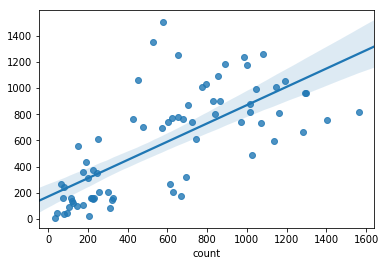

In [8]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')

rp = sns.regplot(x = y_test, y = predictions)

We can now save the model to the disk using pickle.

In [9]:
import pickle
with open('bike_model_xgboost.pkl', 'wb') as file:
    pickle.dump(classifier, file)